In [122]:
import pylcp
import numpy as np
import matplotlib.pyplot as plt
from pylcp.common import progressBar
import scipy.stats as stats
from math import sqrt, cos, sin, exp

### Atomic parameters

Get the properties of the atom we will use for this simulation.

In [123]:
atom = pylcp.atom("41K")
omega = atom.transition[1].nu
isat = atom.transition[1].Isat
gamma = atom.state[2].gamma
mass = atom.mass

print("omega = %e" % (omega))
print("isat = %e" % (isat))
print("gamma = %e" % (gamma))
print("mass = %e" % (mass))

omega = 3.910164e+14
isat = 1.750322e+00
gamma = 3.792188e+07
mass = 6.801871e-26


### Hamiltonian

In [124]:
def return_hamiltonian(delta):
    """
    return hamiltonian for a two-level atom
    with  a given transition frequency
    
    parameters:
    delta - ?
    
    returns:
    hamiltonian - pylcp hamiltonian object
    """
    hg = np.array([[0.]])    
    he = np.array([[-delta]])
    mu_q = np.zeros((3, 1, 1))
    d_q = np.zeros((3, 1, 1))
    d_q[1, 0, 0] = 1.
    return pylcp.hamiltonian(hg, he, mu_q, mu_q, d_q, mass=mass)

### Lasers

In [125]:
def return_lasers(delta, s):
    return pylcp.conventional3DMOTBeams(
        delta=delta, s=s,
        beam_type=pylcp.infinitePlaneWaveBeam
    )

### Magentic field

In [126]:
alpha = 1e-4
mag_field = pylcp.quadrupoleMagneticField(alpha)

### Maxwell distribution sampling

In [127]:
def sample_velocity(mass, temp):
    # sample magnitude and spherical angles
    x = stats.maxwell.rvs(size=1)
    theta = np.pi * stats.uniform.rvs(size=1)
    phi = 2. * np.pi * stats.uniform.rvs(size=1)
    # convert to velocity value and return vector.
    kb = 1.38e-23
    v_mag = sqrt(kb * temp / mass) * x
    v = np.array([
        sin(theta) * cos(phi),
        sin(theta) * sin(phi),
        cos(theta)
    ])
    return v

### Single atom evolution

In [154]:
# define laser detuning in terms of gamma
x = -1.0
# define intensity in terms of saturation value
s = 3.

# starting temperature
t0 = 10.

# define evolution time in terms of lifetime
t = 1.75

hamiltonian = return_hamiltonian(0.)
laser_beams = return_lasers(x, s)

# create equations of motion and solve them.
eqn = pylcp.obe(
    laser_beams, mag_field, hamiltonian,
    r0 = np.zeros(3), v0=sample_velocity(mass, t0)
)
eqn.set_initial_rho_from_rateeq()
soln = eqn.evolve_motion(
    [0, t], random_recoil=True
)

KeyboardInterrupt: 

(3, 384)


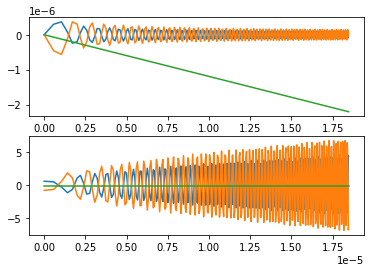

In [151]:
fig_1atm, ax_1atm = plt.subplots(2, 1)
ax_1atm[0].plot(soln.t, np.transpose(soln.r), '-')
ax_1atm[1].plot(soln.t, np.transpose(soln.v), '-')
print(soln.v.shape)

### Temperature